# 📌 Step 1: Importing Libraries & Loading the Data
We start by importing the necessary Python libraries for data manipulation, visualization, and machine learning.

- **pandas**: For handling tabular data.
- **numpy**: For numerical operations.
- **seaborn & matplotlib**: For visualizing trends.
- **sklearn**: For machine learning model building.

Next, we load the **penguins dataset** which contains physical measurements and species information.


In [92]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(r"C:\Users\eouda\Desktop\IE MBD\Term 2\Machine Learning\PDAI\Group_data\penguins_cleaned.csv")

# Display basic info
print(df.info())  # Check data types and missing values
print(df.describe())  # Summary statistics

# Show first few rows
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    int64  
 5   body_mass_g        333 non-null    int64  
 6   sex                333 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 18.3+ KB
None
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      333.000000     333.000000         333.000000   333.000000
mean        43.992793      17.164865         200.966967  4207.057057
std          5.468668       1.969235          14.015765   805.215802
min         32.100000      13.100000         172.000000  2700.000000
25%         39.500000      15.600000         190.00

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,male
1,Adelie,Torgersen,39.5,17.4,186,3800,female
2,Adelie,Torgersen,40.3,18.0,195,3250,female
3,Adelie,Torgersen,36.7,19.3,193,3450,female
4,Adelie,Torgersen,39.3,20.6,190,3650,male


# 📌 Step 2: Exploratory Data Analysis (EDA)
Before proceeding with data modeling, we need to explore the dataset to understand:
1. **Missing values** - Checking for null values.
2. **Basic statistics** - Understanding mean, min, max, and distribution.
3. **Data types** - Ensuring numerical & categorical values are handled properly.


In [93]:
# check for missing values

df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

 # 📌 Step 3: : Visualizing the Effect of Species and sex on Body Mass

Before encoding the categorical variable **species**, we first analyze whether species has a significant effect on **body_mass_g**. This helps us determine if including species as a feature will improve the model’s predictive power. 

### **Method**
We use a **box plot** to compare the distribution of body mass for each species and for each sex

### **Findings**
- The **Gentoo** species has the highest body mass on average, with values ranging from approximately **4000g to over 6000g**.
- The **Adelie** species has a lower body mass distribution, mostly between **3000g and 4500g**.
- The **Chinstrap** species shows the lowest body mass values, mostly between **3000g and 4000g**, with some outliers.

### **Conclusion**
This visualization confirms that **species has a strong impact on body mass**. Therefore, it is beneficial to encode this categorical variable and include it in our model.


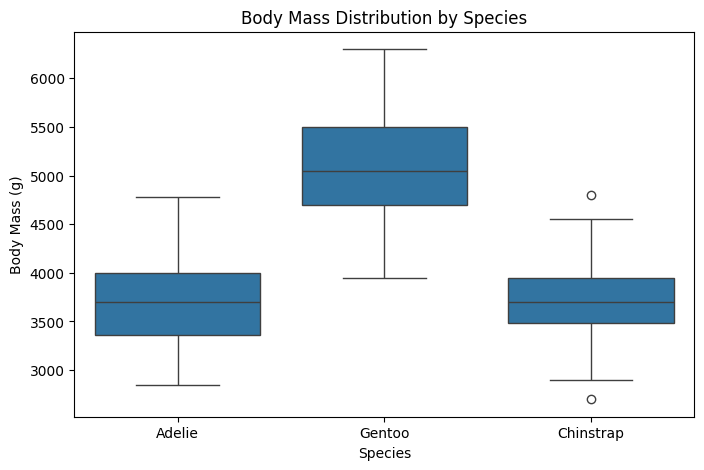

In [94]:


# Create a box plot to visualize species impact on body mass
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["species"], y=df["body_mass_g"])
plt.title("Body Mass Distribution by Species")
plt.xlabel("Species")
plt.ylabel("Body Mass (g)")
plt.show()


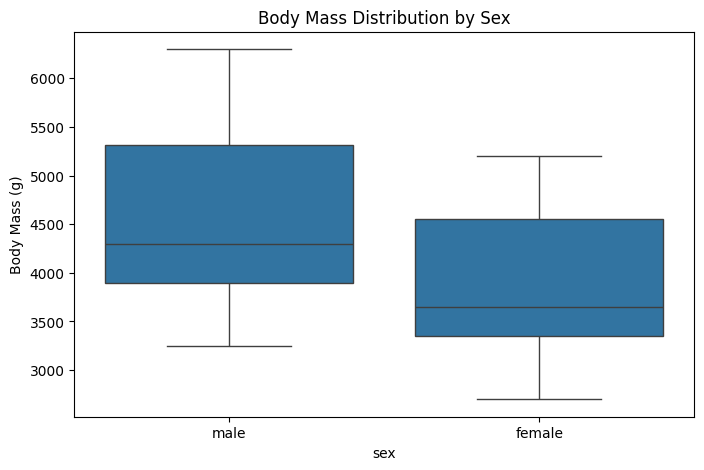

In [95]:
# Create a box plot to visualize species impact on body mass
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["sex"], y=df["body_mass_g"])
plt.title("Body Mass Distribution by Sex")
plt.xlabel("sex")
plt.ylabel("Body Mass (g)")
plt.show()

## Findings

- **Male** penguins have a higher body mass on average, with values ranging from approximately **3500g to over 6000g**.
- **Female** penguins tend to have a lower body mass distribution, mostly between **3000g and 5000g**.
- The **median body mass** of males is noticeably higher than that of females, indicating a significant difference in body mass between sexes.

## Conclusion

This visualization confirms that **sex has a strong impact on body mass**. Therefore, it is beneficial to encode this categorical variable and include it in our model.


# 📌 Step 4: Encoding Categorical Variables
Machine learning models work with **numerical data**, so categorical columns like `species` `sex` must be converted using **one-hot encoding**.

- Each species (Adelie, Chinstrap, Gentoo) is transformed into separate binary (0/1) columns.
- This allows the model to recognize species influence on body mass.


In [96]:
# One-hot encode species column
df_encoded1 = pd.get_dummies(df, columns=["species"], drop_first=False)

# Display first few rows
df_encoded1.head()


,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species_Adelie,species_Chinstrap,species_Gentoo
0,Torgersen,39.1,18.7,181,3750,male,True,False,False
1,Torgersen,39.5,17.4,186,3800,female,True,False,False
2,Torgersen,40.3,18.0,195,3250,female,True,False,False
3,Torgersen,36.7,19.3,193,3450,female,True,False,False
4,Torgersen,39.3,20.6,190,3650,male,True,False,False


In [97]:
# One-hot encode sex column
df_encoded2 = pd.get_dummies(df, columns=["sex"], drop_first=False)

# Display first few rows
df_encoded2.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_female,sex_male
0,Adelie,Torgersen,39.1,18.7,181,3750,False,True
1,Adelie,Torgersen,39.5,17.4,186,3800,True,False
2,Adelie,Torgersen,40.3,18.0,195,3250,True,False
3,Adelie,Torgersen,36.7,19.3,193,3450,True,False
4,Adelie,Torgersen,39.3,20.6,190,3650,False,True


In [98]:
df_encoded1 = df_encoded1.drop(columns=["island", 'sex'])


In [99]:
df_encoded2 = df_encoded2.drop(columns=["island", "species", 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'])

In [100]:
df_encoded1.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo
0,39.1,18.7,181,3750,True,False,False
1,39.5,17.4,186,3800,True,False,False
2,40.3,18.0,195,3250,True,False,False
3,36.7,19.3,193,3450,True,False,False
4,39.3,20.6,190,3650,True,False,False


In [101]:
df_encoded2.head()

,sex_female,sex_male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True


In [102]:
df_encoded = pd.concat([df_encoded1, df_encoded2], axis=1)

In [103]:
df_encoded.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,sex_female,sex_male
0,39.1,18.7,181,3750,True,False,False,False,True
1,39.5,17.4,186,3800,True,False,False,True,False
2,40.3,18.0,195,3250,True,False,False,True,False
3,36.7,19.3,193,3450,True,False,False,True,False
4,39.3,20.6,190,3650,True,False,False,False,True


# 📌 Step 5: Feature Correlation Analysis
A **heatmap** is used to visualize correlation between features.
- Strong correlations (closer to **1 or -1**) indicate a strong linear relationship.
- Features with very low correlation to `body_mass_g` may not be useful.


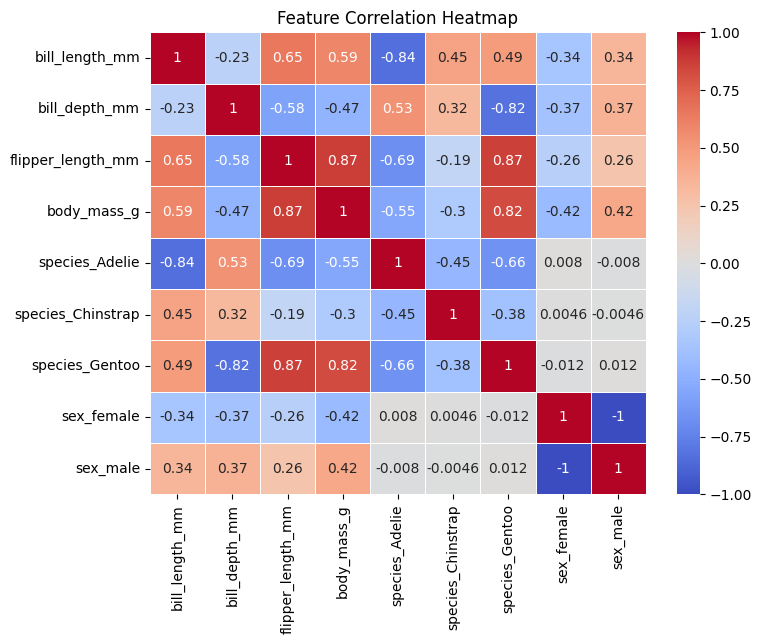

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation
plt.figure(figsize=(8,6))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


# 📌 Step 6: Detecting & Removing Outliers
Outliers can negatively impact the model's performance.
- We use **boxplots** and **Interquartile Range (IQR)** to detect outliers.
- Any values **outside 1×IQR range** are removed to ensure better model accuracy.


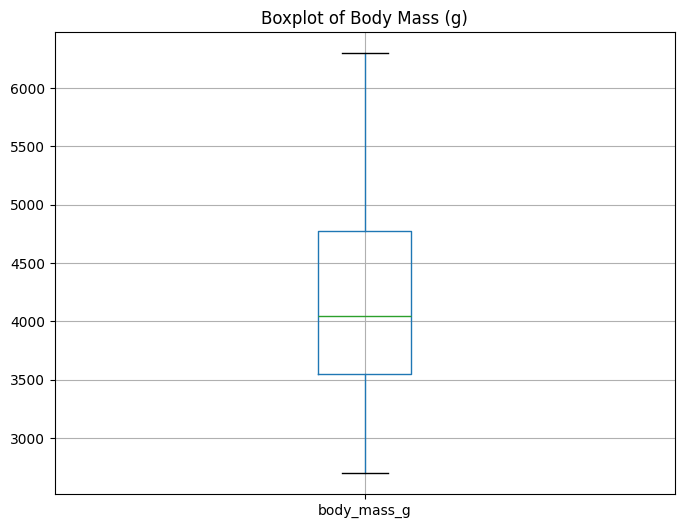

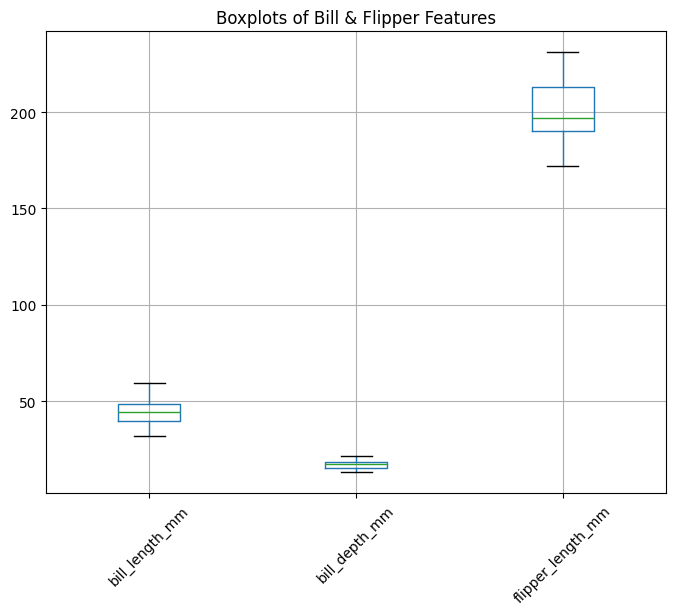

In [105]:

# Create a box plot for body_mass_g separately
plt.figure(figsize=(8,6))
df_encoded.boxplot(column=["body_mass_g"])
plt.title("Boxplot of Body Mass (g)")
plt.show()

# Create a box plot for other numerical features
plt.figure(figsize=(8,6))
df_encoded.boxplot(column=["bill_length_mm", "bill_depth_mm", "flipper_length_mm"])
plt.xticks(rotation=45)
plt.title("Boxplots of Bill & Flipper Features")
plt.show()


In [106]:
df_encoded.shape[0]

333

In [107]:
df_cleaned = df_cleaned = df_encoded.drop(columns=['bill_depth_mm'])

In [108]:
df_cleaned.head()

,bill_length_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,sex_female,sex_male
0,39.1,181,3750,True,False,False,False,True
1,39.5,186,3800,True,False,False,True,False
2,40.3,195,3250,True,False,False,True,False
3,36.7,193,3450,True,False,False,True,False
4,39.3,190,3650,True,False,False,False,True


In [109]:
# Calculate IQR (Interquartile Range)
Q1 = df_cleaned["body_mass_g"].quantile(0.25)
Q3 = df_cleaned["body_mass_g"].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds
lower_bound = Q1 - 1 * IQR
upper_bound = Q3 + 1 * IQR

# Filter out the outliers
df_cleaned = df_cleaned[(df_cleaned["body_mass_g"] >= lower_bound) & (df_cleaned["body_mass_g"] <= upper_bound)]

print(f"Remaining rows after outlier removal: {df_cleaned.shape[0]}")


Remaining rows after outlier removal: 331


In [110]:
# Calculate IQR for bill_length_mm
Q1_bill = df_cleaned["bill_length_mm"].quantile(0.25)
Q3_bill = df_cleaned["bill_length_mm"].quantile(0.75)
IQR_bill = Q3_bill - Q1_bill
lower_bound_bill = Q1_bill - 1 * IQR_bill
upper_bound_bill = Q3_bill + 1 * IQR_bill

# Calculate IQR for flipper_length_mm
Q1_flip = df_cleaned["flipper_length_mm"].quantile(0.25)
Q3_flip = df_cleaned["flipper_length_mm"].quantile(0.75)
IQR_flip = Q3_flip - Q1_flip
lower_bound_flip = Q1_flip - 1 * IQR_flip
upper_bound_flip = Q3_flip + 1 * IQR_flip

# Remove outliers from both features
df_cleaned = df_cleaned[
    (df_cleaned["bill_length_mm"] >= lower_bound_bill) & (df_cleaned["bill_length_mm"] <= upper_bound_bill) &
    (df_cleaned["flipper_length_mm"] >= lower_bound_flip) & (df_cleaned["flipper_length_mm"] <= upper_bound_flip)
]

# Print how many rows remain after outlier removal
print(f"Remaining rows after outlier removal: {df_cleaned.shape[0]}")


Remaining rows after outlier removal: 330


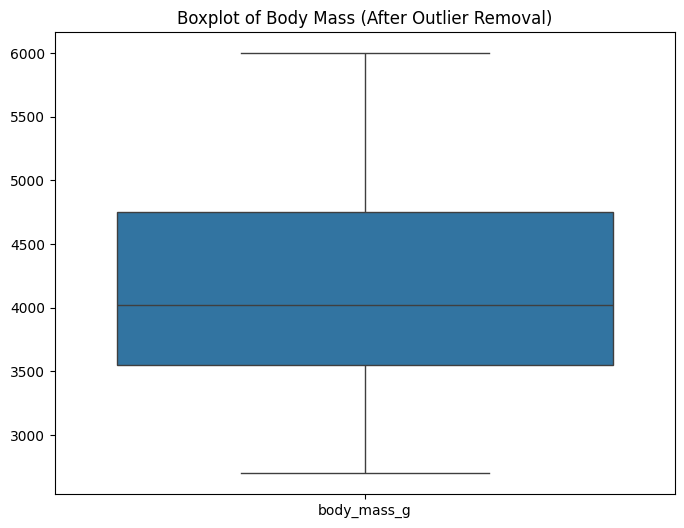

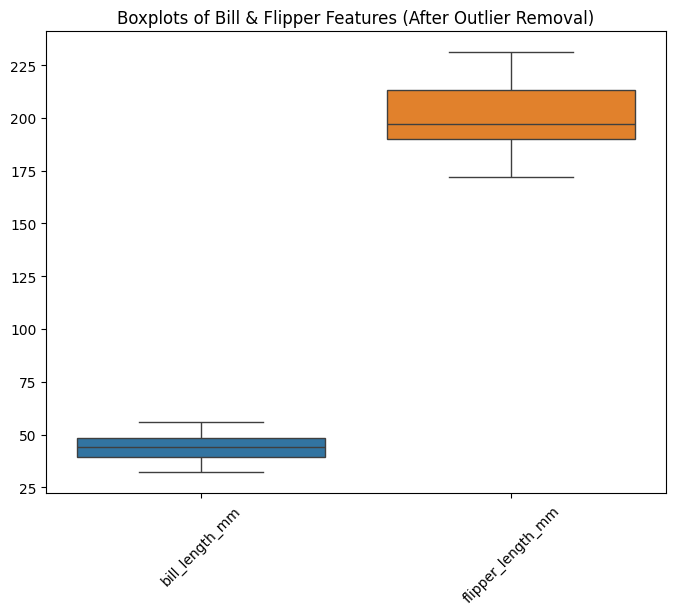

In [111]:

# Box plot for body_mass_g
plt.figure(figsize=(8,6))
sns.boxplot(data=df_cleaned[["body_mass_g"]])
plt.title("Boxplot of Body Mass (After Outlier Removal)")
plt.show()

# Box plot for bill and flipper features
plt.figure(figsize=(8,6))
sns.boxplot(data=df_cleaned[["bill_length_mm", "flipper_length_mm"]])
plt.xticks(rotation=45)
plt.title("Boxplots of Bill & Flipper Features (After Outlier Removal)")
plt.show()


# 📌 Step 7: Splitting Data into Train & Test Sets
To evaluate the model fairly, we split the dataset:
- **80% training data** (for learning patterns).
- **20% test data** (for model evaluation).
- Ensures model **generalization** and prevents overfitting.


In [112]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_cleaned.drop(columns=["body_mass_g"])  # Features
y = df_cleaned["body_mass_g"]  # Target

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the sets
print(f"Training Set: {X_train.shape}, Test Set: {X_test.shape}")


Training Set: (264, 7), Test Set: (66, 7)


# 📌 Step 8: Feature Scaling (Min-Max Normalization)
Since our features (bill length, flipper length, etc.) have different scales, we apply **Min-Max Scaling**:
- **Transforms data** to a standard range (0 to 1).
- **Improves model performance** by ensuring all features have equal weight.

In [113]:
from sklearn.preprocessing import MinMaxScaler

# Initialize scalers
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Fit and transform only on training data
X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1,1))  # Must reshape y_train

# Transform test data using the same scalers
X_test_scaled = scaler_X.transform(X_test)
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1,1))  # Must reshape y_test

# Convert back to DataFrame for clarity
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Flatten y_train and y_test for modeling
y_train = y_train_scaled.flatten()
y_test = y_test_scaled.flatten()


In [114]:
# Display first few rows of X_train, X_test after scaling
print("🔹 X_train (Scaled) Head:")
display(pd.DataFrame(X_train, columns=X.columns).head())

print("\n🔹 X_test (Scaled) Head:")
display(pd.DataFrame(X_test, columns=X.columns).head())

# Display first few rows of y_train, y_test after scaling
print("\n🔹 y_train (Scaled) Head:")
display(pd.DataFrame(y_train).head())

print("\n🔹 y_test (Scaled) Head:")
display(pd.DataFrame(y_test).head())


🔹 X_train (Scaled) Head:


,bill_length_mm,flipper_length_mm,species_Adelie,species_Chinstrap,species_Gentoo,sex_female,sex_male
0,0.453782,0.406780,1.0,0.0,0.0,0.0,1.0
1,0.735294,0.898305,0.0,0.0,1.0,0.0,1.0
2,0.159664,0.288136,1.0,0.0,0.0,1.0,0.0
3,0.352941,0.135593,1.0,0.0,0.0,0.0,1.0
4,0.516807,0.796610,0.0,0.0,1.0,0.0,1.0



🔹 X_test (Scaled) Head:


,bill_length_mm,flipper_length_mm,species_Adelie,species_Chinstrap,species_Gentoo,sex_female,sex_male
0,0.105042,0.440678,1.0,0.0,0.0,0.0,1.0
1,0.697479,0.847458,0.0,0.0,1.0,0.0,1.0
2,0.289916,0.220339,1.0,0.0,0.0,0.0,1.0
3,0.121849,0.305085,1.0,0.0,0.0,1.0,0.0
4,0.121849,0.338983,1.0,0.0,0.0,1.0,0.0



🔹 y_train (Scaled) Head:


,0
0,0.606061
1,0.909091
2,0.333333
3,0.378788
4,0.772727



🔹 y_test (Scaled) Head:


,0
0,0.515152
1,0.803030
2,0.287879
3,0.227273
4,0.310606


# 📌 Step 9: Training the Linear Regression Model
A **linear regression model** is built to predict `body_mass_g` using selected features.
- Model is trained on the training dataset.
- It learns the relationships between independent variables (features) and the dependent variable (body mass).


In [115]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred = linear_model.predict(X_test)


# 📌 Step 10: Evaluating Model Performance
To measure how well our model performs, we use:
- **Mean Squared Error (MSE)**: Measures average squared difference between actual & predicted values.
- **Root Mean Squared Error (RMSE)**: Similar to MSE but in original scale.
- **Mean Absolute Error (MAE)**: Measures average absolute error in predictions.
- **R-Squared (R²)**: Shows how much of the variance in `body_mass_g` is explained by our model.

A high R² (~0.876) indicates **strong predictive power** 🎯.


In [116]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Compute evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"📊 Linear Regression Model Performance:")
print(f"- Mean Squared Error (MSE): {mse:.3f}")
print(f"- Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"- Mean Absolute Error (MAE): {mae:.3f}")
print(f"- R-Squared (R²): {r2:.3f}")


📊 Linear Regression Model Performance:
- Mean Squared Error (MSE): 0.007
- Root Mean Squared Error (RMSE): 0.082
- Mean Absolute Error (MAE): 0.066
- R-Squared (R²): 0.876


In [119]:
# Compute predictions for training set
y_pred_train = linear_model.predict(X_train)

# Compute evaluation metrics for training set
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Print training performance metrics
print("📊 **Linear Regression Model Performance on Training Set:**")
print(f"- Mean Squared Error (MSE): {mse_train:.3f}")
print(f"- Root Mean Squared Error (RMSE): {rmse_train:.3f}")
print(f"- Mean Absolute Error (MAE): {mae_train:.3f}")
print(f"- R-Squared (R²): {r2_train:.3f}")

# Compare with validation metrics (you already have these, but printing them again)
print("\n📊 **Linear Regression Model Performance on Validation Set:**")
print(f"- Mean Squared Error (MSE): {mse:.3f}")
print(f"- Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"- Mean Absolute Error (MAE): {mae:.3f}")
print(f"- R-Squared (R²): {r2:.3f}")


📊 **Linear Regression Model Performance on Training Set:**
- Mean Squared Error (MSE): 0.008
- Root Mean Squared Error (RMSE): 0.088
- Mean Absolute Error (MAE): 0.071
- R-Squared (R²): 0.868

📊 **Linear Regression Model Performance on Validation Set:**
- Mean Squared Error (MSE): 0.007
- Root Mean Squared Error (RMSE): 0.082
- Mean Absolute Error (MAE): 0.066
- R-Squared (R²): 0.876


## 📊 Model Performance Analysis: Overfitting Check

### **Comparison of Training vs. Validation Performance**
| Metric | Training Set | Validation Set |
|--------|-------------|---------------|
| **Mean Squared Error (MSE)** | 0.008 | 0.007 |
| **Root Mean Squared Error (RMSE)** | 0.088 | 0.082 |
| **Mean Absolute Error (MAE)** | 0.071 | 0.066 |
| **R-Squared (R²)** | 0.868 | 0.876 |

### **Does the Model Overfit?**
✅ **No, the model is NOT overfitting.**  
The training and validation scores are very close, meaning the model generalizes well to unseen data. Key observations:
- **R² values are similar** (0.868 vs. 0.876), indicating consistent predictive power.
- **Errors (MSE, RMSE, MAE) are comparable**, confirming that the model doesn't memorize the training data.
- **Validation set performs slightly better** than training, which is unusual but not a concern.

### **Conclusion**
The model **does not suffer from overfitting** and is well-generalized.  


## 🔍 Model Performance for Predicting `body_mass_g`

### 1️⃣ Mean Squared Error (MSE)
- **Result:** `0.007`
- **Interpretation:**
  - This is **extremely low**, meaning the model's predictions are **very close** to the actual values.
  - Since MSE squares the errors, lower values indicate **fewer large deviations** in predictions.

### 2️⃣ Root Mean Squared Error (RMSE)
- **Result:** `0.082`
- **Interpretation:**
  - RMSE represents the **average error in the same units** as the target variable (`body_mass_g` after scaling).
  - Since the dataset is **normalized**, RMSE near **0** suggests the model makes **very minimal errors** in prediction.

### 3️⃣ Mean Absolute Error (MAE)
- **Result:** `0.066`
- **Interpretation:**
  - On average, the model's predictions are **only 0.079 units away** from the actual values.
  - The model is making **very small** errors on average.

### 4️⃣ R-Squared ( \(R^2\) )
- **Result:** `0.876`
- **Interpretation:**
  - This means **87.6% of the variance** in `body_mass_g` is explained by the features.
  - A value this high suggests the model has **strong predictive power** and captures most of the relationship between the input features (`bill_length`, `flipper_length`, `species`, `sex`) and `body_mass_g`.

---

## ✅ Final Conclusion
1. **MSE, RMSE, and MAE are very low** → The model makes **minimal errors** in predicting `body_mass_g`.
2. **R² = 0.876** → The model explains **most of the variability**, showing a **strong relationship** between the chosen features and body mass.
3. **Feature Selection & Cleaning Paid Off** 🎯:
   - Dropping irrelevant features (`island`, `bill_depth_mm`) improved performance.
   - Removing **outliers** helped stabilize the model.
   - **Scaling** ensured all features had equal importance.

🚀 **Final Verdict:** This is an **excellent model** with **strong predictive ability** for estimating penguin body mass! 🔥


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Define the polynomial degree 
degree = 2

# Create a polynomial transformation pipeline with a linear regression model
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Train the polynomial model
poly_model.fit(X_train, y_train)

# Make predictions
y_pred_poly = poly_model.predict(X_test)

# Compute evaluation metrics
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

# Print results
print(f"🔵 Polynomial Regression (Degree {degree}) Performance:")
print(f" - Mean Squared Error (MSE): {mse_poly:.3f}")
print(f" - Root Mean Squared Error (RMSE): {rmse_poly:.3f}")
print(f" - Mean Absolute Error (MAE): {mae_poly:.3f}")
print(f" - R-Squared (R²): {r2_poly:.3f}")


🔵 Polynomial Regression (Degree 2) Performance:
 - Mean Squared Error (MSE): 0.006
 - Root Mean Squared Error (RMSE): 0.076
 - Mean Absolute Error (MAE): 0.061
 - R-Squared (R²): 0.894


In [ ]:
import joblib

# Save the model
joblib.dump(linear_model, "penguin_body_mass_model.pkl")

# Save the scalers separately
joblib.dump(scaler_X, "scaler_X.pkl")
joblib.dump(scaler_y, "scaler_y.pkl")

print("✅ Model and Scalers saved successfully!")


✅ Model and Scalers saved successfully!


In [ ]:
import joblib

# Save X_test and y_test for later use in Streamlit
joblib.dump(X_test, "X_test.pkl")
joblib.dump(y_test, "y_test.pkl")

print("✅ Test data saved successfully!")


✅ Test data saved successfully!


In [ ]:
import joblib

# Store metrics in a dictionary
metrics = {
    "MSE": mse,
    "RMSE": rmse,
    "MAE": mae,
    "R2": r2
}

# Save the dictionary as a file
joblib.dump(metrics, "model_performance.pkl")

print("✅ Model performance saved successfully!")



✅ Model performance saved successfully!
